In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)
     

2239
118


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [ ]:
train_ds = image_dataset_from_directory(
    directory=data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset="training"
    )
val_ds = image_dataset_from_directory(
    directory=data_dir_train,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    seed=123,
    validation_split=0.2,
    subset="validation"
    )

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
len(train_ds)

56

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for images, labels in train_ds:
    unique_li = []
    unique_images = []
    for i in range(32):
        if class_names[labels[i]] not in unique_li:
            unique_li.append(class_names[labels[i]])
            unique_images.append((class_names[labels[i]],images[i]))

In [ ]:
unique_li

['basal cell carcinoma',
 'nevus',
 'vascular lesion',
 'dermatofibroma',
 'melanoma',
 'actinic keratosis',
 'pigmented benign keratosis',
 'squamous cell carcinoma',
 'seborrheic keratosis']

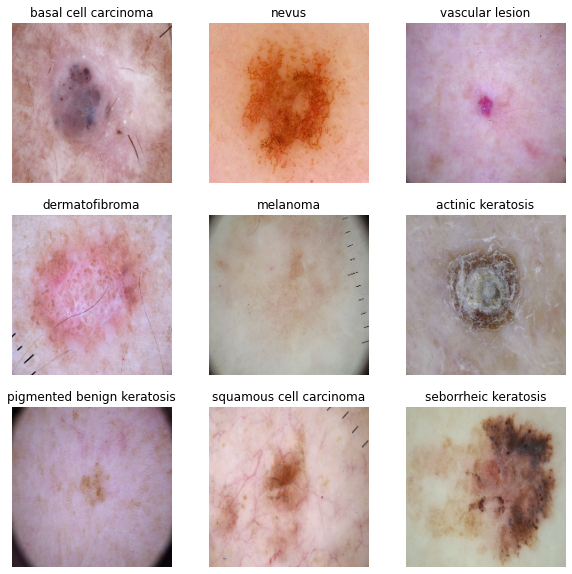

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(unique_images[i][1].numpy().astype("uint8"))
  plt.title(unique_images[i][0])
  plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [ ]:
labels_batch

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([5, 1, 8, 4, 5, 1, 4, 5, 3, 5, 5, 8, 3, 3, 8, 5, 1, 6, 5, 8, 3, 3,
       1, 1, 4, 1, 2, 4, 4, 1, 4, 1], dtype=int32)>

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
img_size = 180

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3))

model = Sequential([
  normalization_layer,
  layers.experimental.preprocessing.Resizing(img_size, img_size),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 resizing (Resizing)         (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [ ]:
img_size = 180

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3))

model2 = Sequential([
  normalization_layer, 
  layers.experimental.preprocessing.Resizing(img_size, img_size),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model2.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 150s 2s/step - loss: 1.9865 - accuracy: 0.2522 - val_loss: 1.8868 - val_accuracy: 0.3154
Epoch 2/20
56/56 [==============================] - 59s 1s/step - loss: 1.8238 - accuracy: 0.3337 - val_loss: 1.7010 - val_accuracy: 0.4027
Epoch 3/20
56/56 [==============================] - 57s 1s/step - loss: 1.6245 - accuracy: 0.4358 - val_loss: 1.7212 - val_accuracy: 0.3714
Epoch 4/20
56/56 [==============================] - 57s 1s/step - loss: 1.5041 - accuracy: 0.4704 - val_loss: 1.4605 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 57s 1s/step - loss: 1.3599 - accuracy: 0.5285 - val_loss: 1.4677 - val_accuracy: 0.5369
Epoch 6/20
56/56 [==============================] - 59s 1s/step - loss: 1.2734 - accuracy: 0.5720 - val_loss: 1.3687 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 56s 1s/step - loss: 1.2558 - accuracy: 0.5636 - val_loss: 1.4739 - val_accuracy: 0.5369
Epoch 8/20
56/56 [============

In [ ]:
def plot_accuracy(history,epochs):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

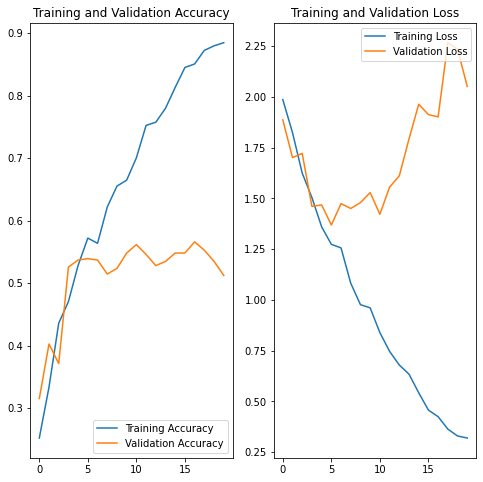

In [ ]:
plot_accuracy(history,epochs)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
accuracy_history_df = pd.DataFrame(data=[{"Type":"Vanilla","Training Accuracy":acc[-1],"Validation Accuracy":val_acc[-1],"Epochs":epochs}])
accuracy_history_df

,Type,Training Accuracy,Validation Accuracy,Epochs
0,Vanilla,0.884487,0.512304,20


In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomRotation(0.2)
])

(-0.5, 179.5, 179.5, -0.5)

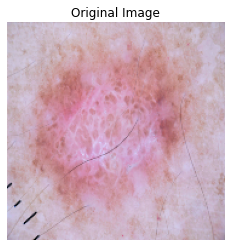

In [ ]:
import random
image = tf.expand_dims(unique_images[random.randint(0,9)][1], 0)
plt.imshow(image[0].numpy().astype("uint8"))
plt.title("Original Image")
plt.axis("off")

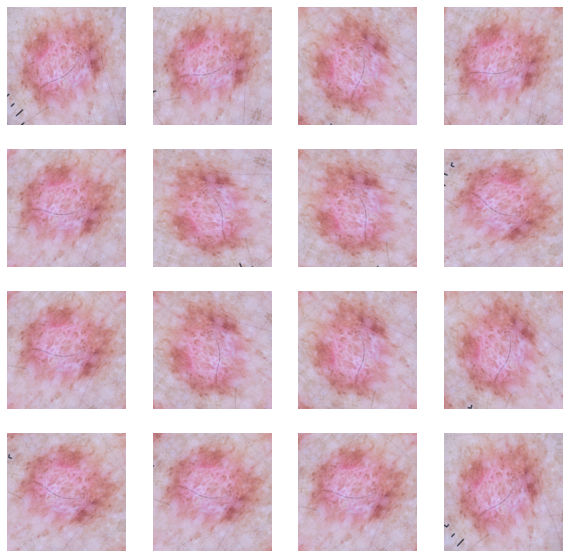

In [ ]:
augmented_image = data_augmentation(image)
plt.figure(figsize=(10, 10))
for i in range(16):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(augmented_image[0].numpy().astype("uint8"))
  plt.axis("off")

In [ ]:
img_size = 180

model_augm1 = Sequential([
  normalization_layer, 
  layers.experimental.preprocessing.Resizing(img_size, img_size),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model_augm1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )
model_augm1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 resizing_2 (Resizing)       (None, 180, 180, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                      

In [ ]:
epochs = 20

history_augm1 = model_augm1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 69s 1s/step - loss: 2.1317 - accuracy: 0.2344 - val_loss: 1.8672 - val_accuracy: 0.3445
Epoch 2/20
56/56 [==============================] - 63s 1s/step - loss: 1.8123 - accuracy: 0.3393 - val_loss: 1.7172 - val_accuracy: 0.3848
Epoch 3/20
56/56 [==============================] - 63s 1s/step - loss: 1.6585 - accuracy: 0.4079 - val_loss: 1.5276 - val_accuracy: 0.4899
Epoch 4/20
56/56 [==============================] - 65s 1s/step - loss: 1.5190 - accuracy: 0.4559 - val_loss: 1.4796 - val_accuracy: 0.4855
Epoch 5/20
56/56 [==============================] - 62s 1s/step - loss: 1.5199 - accuracy: 0.4637 - val_loss: 1.4446 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 63s 1s/step - loss: 1.4153 - accuracy: 0.5045 - val_loss: 1.4197 - val_accuracy: 0.4989
Epoch 7/20
56/56 [==============================] - 65s 1s/step - loss: 1.3420 - accuracy: 0.5273 - val_loss: 1.4034 - val_accuracy: 0.5257
Epoch 8/20
56/56 [=============

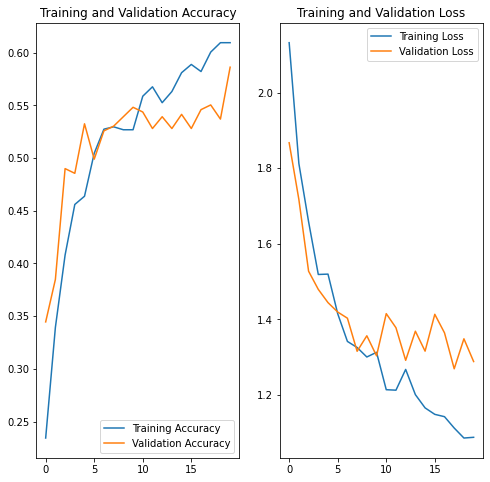

In [ ]:
plot_accuracy(history_augm1,epochs)

In [ ]:
acc = history_augm1.history['accuracy']
val_acc = history_augm1.history['val_accuracy']
accuracy_history_df = accuracy_history_df.append([{"Type":"Data Augmentation","Training Accuracy":acc[-1],"Validation Accuracy":val_acc[-1],"Epochs":epochs}])
accuracy_history_df

,Type,Training Accuracy,Validation Accuracy,Epochs
0,Vanilla,0.884487,0.512304,20
0,Data Augmentation,0.609375,0.586130,20


In [ ]:
model_dropout = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width, 3)),# Normalizing 
  layers.experimental.preprocessing.Resizing(img_size, img_size),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_dropout.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 resizing_3 (Resizing)       (None, 180, 180, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                      

In [ ]:
epochs = 20
history_dropout = model_dropout.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  batch_size=32
)

Epoch 1/20


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 66s 1s/step - loss: 2.0502 - accuracy: 0.2405 - val_loss: 1.8273 - val_accuracy: 0.3647
Epoch 2/20
56/56 [==============================] - 63s 1s/step - loss: 1.7052 - accuracy: 0.3850 - val_loss: 1.5730 - val_accuracy: 0.4631
Epoch 3/20
56/56 [==============================] - 65s 1s/step - loss: 1.5409 - accuracy: 0.4648 - val_loss: 1.7303 - val_accuracy: 0.3758
Epoch 4/20
56/56 [==============================] - 63s 1s/step - loss: 1.5211 - accuracy: 0.4688 - val_loss: 1.4385 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 63s 1s/step - loss: 1.4005 - accuracy: 0.5022 - val_loss: 1.3661 - val_accuracy: 0.5391
Epoch 6/20
56/56 [==============================] - 63s 1s/step - loss: 1.3482 - accuracy: 0.5201 - val_loss: 1.3821 - val_accuracy: 0.5347
Epoch 7/20
56/56 [==============================] - 65s 1s/step - loss: 1.3312 - accuracy: 0.5368 - val_loss: 1.4390 - val_accuracy: 0.5190
Epoch 8/20
56/56 [=============

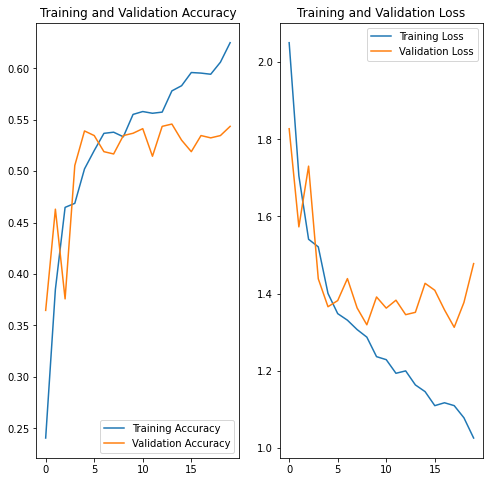

In [ ]:
plot_accuracy(history_dropout,epochs)

In [ ]:
acc = history_dropout.history['accuracy']
val_acc = history_dropout.history['val_accuracy']
accuracy_history_df = accuracy_history_df.append([{"Type":"Dropout","Training Accuracy":acc[-1],"Validation Accuracy":val_acc[-1],"Epochs":epochs}])
accuracy_history_df

,Type,Training Accuracy,Validation Accuracy,Epochs
0,Vanilla,0.884487,0.512304,20
0,Data Augmentation,0.609375,0.586130,20
0,Dropout,0.625000,0.543624,20


In [ ]:
class_distr={}

for image_batch, labels_batch in train_ds:
 
    for i in range(image_batch.shape[0]):
      if class_names[labels_batch[i]] in class_distr:
        class_distr[class_names[labels_batch[i]]]+=1
      else:
        class_distr[class_names[labels_batch[i]]]=1

class_distr

{'melanoma': 352,
 'actinic keratosis': 92,
 'basal cell carcinoma': 309,
 'pigmented benign keratosis': 370,
 'nevus': 277,
 'vascular lesion': 115,
 'seborrheic keratosis': 58,
 'dermatofibroma': 77,
 'squamous cell carcinoma': 142}

In [ ]:
df_sample_distr = pd.DataFrame({"Class Name":class_distr.keys(), "Samples":class_distr.values()})
df_sample_distr.sort_values('Samples',ascending=False)

,Class Name,Samples
3,pigmented benign keratosis,370
0,melanoma,352
2,basal cell carcinoma,309
4,nevus,277
8,squamous cell carcinoma,142
5,vascular lesion,115
1,actinic keratosis,92
7,dermatofibroma,77
6,seborrheic keratosis,58


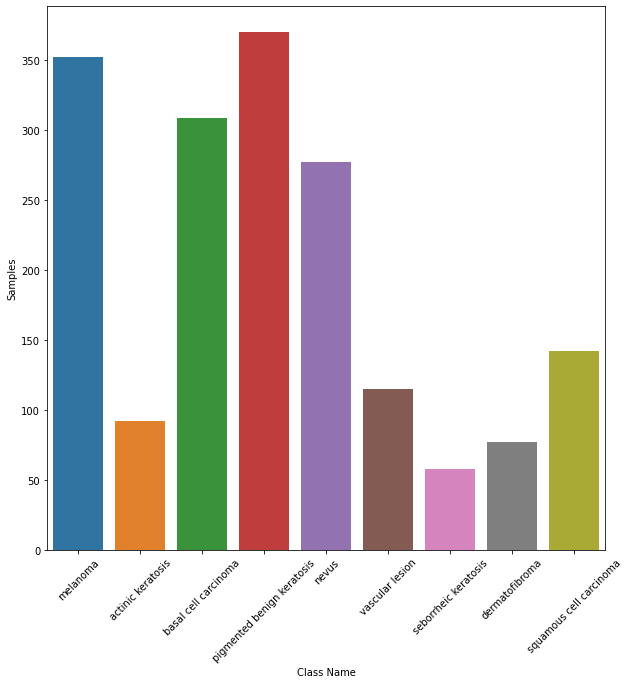

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.barplot(data=df_sample_distr,x='Class Name',y='Samples')
plt.xticks(rotation = 45) 
plt.show()

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import Augmentor

In [ ]:
    p = Augmentor.Pipeline('/content/gdrive/MyDrive/Untitled Folder')


Initialised with 0 image(s) found.
Output directory set to /content/gdrive/MyDrive/Untitled Folder/output.

In [ ]:
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

In [ ]:
p.sample(300)


Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F40A8D7D2E0>: 100%|██████████| 300/300 [00:31<00:00,  9.58 Samples/s]


In [ ]:
path_to_training_dataset=""
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

OSError: ignored

In [ ]:
def load_data_raw (path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 9)
    
    return files, targets

train_filenames, train_targets = load_data_raw(data_dir_train)

NameError: ignored

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)
     

0
